In [ ]:
pip install deepface

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from deepface import DeepFace as df
from retinaface import RetinaFace as m
from PIL import Image

24-01-28 10:28:27 - Directory /root/.deepface created
24-01-28 10:28:27 - Directory /root/.deepface/weights created


In [4]:
import pandas as pd

In [ ]:
video = cv2.VideoCapture('/content/drive/MyDrive/Face_Recognition_Based_Attendance_System/Muhammad_Shalim_T/prototype/Data/Video/input1.mp4')
count = 0
frames_arr = []
while video.isOpened():
    ret, frame = video.read()

    if not ret:
        break
    frames_arr.append(frame)                                         # Frames stored in frames_arr
    count += 1
video.release()
print(len(frames_arr), count)


img = frames_arr[0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
frames = []
frames.append(frames_arr[0])
for i in range(1, len(frames_arr)):

    orb = cv2.ORB_create()

    keypoints1, descriptors1 = orb.detectAndCompute(frames[-1], None)
    keypoints2, descriptors2 = orb.detectAndCompute(frames_arr[i], None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)

    matches = sorted(matches, key=lambda x: x.distance)

    if len(matches) < 300:
        frames.append(frames_arr[i])
print(len(frames))

214


In [ ]:
image_directory = "/content/drive/MyDrive/Face_Recognition_Based_Attendance_System/Muhammad_Shalim_T/prototype/Data/known_faces"

file_list = os.listdir(image_directory)

paths = [os.path.join(image_directory, file) for file in file_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

#print(paths)
names = []
for path in paths:

    name=path[64:-4]
    names.append(name)
#print()
#print(names)

known_faces = []
for i in range(len(names)):
    known_faces.append([paths[i], names[i]])
print()
for i in range(len(known_faces)):
    print(known_faces[i][1])

In [11]:
detected_faces = []
count = 1
for frame in frames[::50]:
    obj = m.detect_faces(img_path=frame, threshold = 0.999)
    if isinstance(obj, dict):
        for key in obj.keys():
            faceid = obj[key]
            area = faceid['facial_area']
            x1,y1,x2,y2=area
            extracted_face=frame[y1:y2,x1:x2]
            extracted_face=cv2.cvtColor(extracted_face,cv2.COLOR_BGR2RGB)
            detected_faces.append(extracted_face)

In [8]:
detected_faces = []
for frame in frames:
    obj = df.extract_faces(img_path=frame)
    if isinstance(obj, dict):
        for key in obj.keys():
            faceid = obj[key]
            area = faceid['facial_area']
            x1,y1,x2,y2=area
            extracted_face=frame[y1:y2,x1:x2]
            extracted_face=cv2.cvtColor(extracted_face,cv2.COLOR_BGR2RGB)
            detected_faces.append(extracted_face)

In [ ]:
faces = []
faces.append(cv2.convertScaleAbs(detected_faces[0]))

for i in range(1, len(detected_faces)):
    img2 = cv2.convertScaleAbs(detected_faces[i])

    orb = cv2.ORB_create()

    keypoints1, descriptors1 = orb.detectAndCompute(faces[-1], None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    if descriptors2 is None:

        continue

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)

    matches = sorted(matches, key=lambda x: x.distance)

    if len(matches) < 300:
        faces.append(detected_faces[i])
detected_faces[:] = faces[:]

In [12]:
print(len(detected_faces))

38


In [ ]:
res = []
models = []
for face in detected_faces:

  model = df.find(img_path = face, db_path = '/content/drive/MyDrive/Face_Recognition_Based_Attendance_System/Muhammad_Shalim_T/prototype/Data/known_faces', model_name="Facenet",distance_metric="euclidean",enforce_detection=False,normalization="Facenet")
  models.append(model)

In [16]:
count = 0
for model in models:
  if len(model[0]) > 0:
    print(count , "_ ", model[0]['identity'].values[0][109:-4])
  else:
    print('Unknown Face detected')
  count += 1

0 _  Faizan_T_P
1 _  Arjun_CM
Unknown Face detected
3 _  Yadu_Krishna1
4 _  Yadu_Krishna
Unknown Face detected
6 _  Muhammed_Asad
7 _  Neha_P
Unknown Face detected
9 _  Aswanth_K1
Unknown Face detected
11 _  Vyshna_S
12 _  Arjun_CM
Unknown Face detected
14 _  Aswanth_K
Unknown Face detected
16 _  Neha_P
Unknown Face detected
18 _  Aswathi_P_V1
19 _  Aswathi_P_V1
Unknown Face detected
Unknown Face detected
22 _  Aswanth_K
Unknown Face detected
24 _  Aswanth_K1
Unknown Face detected
26 _  Aswanth_K1
27 _  Aswanth_K1
Unknown Face detected
Unknown Face detected
Unknown Face detected
Unknown Face detected
Unknown Face detected
33 _  A_Nafih
34 _  Devika_J
Unknown Face detected
Unknown Face detected
Unknown Face detected


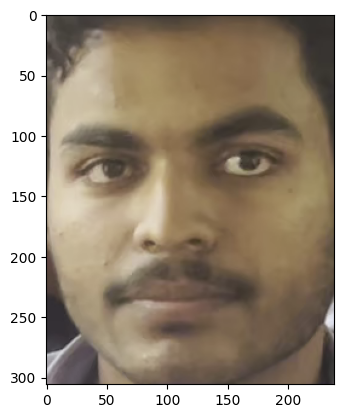

In [ ]:
plt.imshow(detected_faces[4])

In [ ]:
models[0][0]['distance']

0    8.190532
1    8.900469
Name: distance, dtype: float64